In [2]:
import random
import numpy as np
from numpy import prod
from scipy.stats import beta

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

from collections import Counter

/var/folders/g_/v_4svj7n17z2m3fg9lhk_xcw0000gp/T/ipykernel_30813/424043200.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf')


In [3]:
def normalize_probs(probs):
    total = sum(probs)
    normedprobs = []
    for p in probs:
        normedprobs.append(p / total)
    return normedprobs

def roulette_wheel(normedprobs):
    r = random.random()
    # print("This is the r value: " + str(r))
    # r = 0.3
    accumulator = normedprobs[0]
    # print("This is the accumulator value: " + str(accumulator))
    # accumulator 0.25
    for i in range(len(normedprobs)):
        # for 0.25, 0.50, 0.75, 0.90
        if r < accumulator:
            # if 0.3 < 0.25
            # if 0.3 < 0.50
            # if 0.3 < 0.75
            # if 0.3 < 0.90
            # print("This is the i value: " + str(i))
            return i
            # NO
            # 0.50
            # 0.75
            # 0.90
        accumulator = accumulator + normedprobs[i + 1]
        # print("This is the new accumulator value: " + str(accumulator))
        # 0.25 + 0.50
        # accumulator = 0.75
        # 0.50 + 0.75
        # accumulator = 1.25
        # 0.75 + 0.90
        # accumulator = 1.65
        # 0.90
        # accumulator = 0.90

In [4]:
probs1 = [0.25, 0.50, 0.75, 0.90]
print(sum(probs1))

normalized_probs1 = normalize_probs(probs1)
print(normalized_probs1)

normalized_probs1 = normalize_probs(probs1)
roulette_wheel(normalized_probs1)  
# roulette wheel returns the index of the value that is larger than that random number generated at the start
# at what index is the accumulator greater than the random number?
# if it continues to be smaller, add the value of the next index to the accumulator and then compare the r and the new accumulator
# r < 0.10416666666666667 (if true, return index 0)
# r < 0.10416666666666667 + 0.20833333333333334 = 0.3125 (if true, return index 1)
# r < 0.3125 + 0.3125 = 0.625 (if true, return index 2)
# r < 0.625 + 0.375 = 1 (if true, return index 3)
# the chances that r is a little value, that is smaller than the smallest value of the probabilities


2.4
[0.10416666666666667, 0.20833333333333334, 0.3125, 0.375]


2

In [5]:
list = []
for i in range(50):
    list.append(roulette_wheel(normalized_probs1))

list

[1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 3,
 1,
 1,
 2,
 3,
 0,
 2,
 3,
 0,
 3,
 2,
 3,
 2,
 2,
 0,
 2,
 0,
 1,
 3,
 2,
 3,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 3,
 1,
 0,
 2,
 0,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 0,
 1]

In [6]:
print(list.count(0))
print(list.count(1))
print(list.count(2))
print(list.count(3))

Counter(list)
# big index value = takes up most of the space in the sum of index values
# 0.90 occupies more space than 0.25, out of 2.4, so when normalized

my_dict = dict.fromkeys(probs1)
print(my_dict)

# for key, val in zip(my_dict, normalized_probs1):
#     my_dict[key] = val

for key, val in zip(my_dict, 
                    [
                        [list.count(0), normalized_probs1[0]], 
                        [list.count(1), normalized_probs1[1]],
                        [list.count(2), normalized_probs1[2]],
                        [list.count(3), normalized_probs1[3]]
                    ]):
        my_dict[key] = val    

print(my_dict)

7
15
16
12
{0.25: None, 0.5: None, 0.75: None, 0.9: None}
{0.25: [7, 0.10416666666666667], 0.5: [15, 0.20833333333333334], 0.75: [16, 0.3125], 0.9: [12, 0.375]}


probability of using word 1

In [7]:
# spacing is 0.01

grid_granularity = 100
grid_increment = 1 / grid_granularity
 
possible_pw1 = []
for i in range(grid_granularity):
    possible_pw1.append(grid_increment / 2 + (grid_increment * i))
possible_pw1

[0.005,
 0.015,
 0.025,
 0.034999999999999996,
 0.045,
 0.055,
 0.065,
 0.07500000000000001,
 0.085,
 0.095,
 0.10500000000000001,
 0.115,
 0.125,
 0.135,
 0.14500000000000002,
 0.155,
 0.165,
 0.17500000000000002,
 0.185,
 0.195,
 0.20500000000000002,
 0.215,
 0.225,
 0.23500000000000001,
 0.245,
 0.255,
 0.265,
 0.275,
 0.28500000000000003,
 0.295,
 0.305,
 0.315,
 0.325,
 0.335,
 0.34500000000000003,
 0.35500000000000004,
 0.365,
 0.375,
 0.385,
 0.395,
 0.405,
 0.41500000000000004,
 0.425,
 0.435,
 0.445,
 0.455,
 0.465,
 0.47500000000000003,
 0.485,
 0.495,
 0.505,
 0.515,
 0.525,
 0.535,
 0.545,
 0.555,
 0.5650000000000001,
 0.5750000000000001,
 0.585,
 0.595,
 0.605,
 0.615,
 0.625,
 0.635,
 0.645,
 0.655,
 0.665,
 0.675,
 0.685,
 0.6950000000000001,
 0.7050000000000001,
 0.715,
 0.725,
 0.735,
 0.745,
 0.755,
 0.765,
 0.775,
 0.785,
 0.795,
 0.805,
 0.8150000000000001,
 0.8250000000000001,
 0.8350000000000001,
 0.845,
 0.855,
 0.865,
 0.875,
 0.885,
 0.895,
 0.905,
 0.915,
 0.9

$$
\frac{1/100}{2} + (\frac{1}{100} * 0)
$$
$$
\frac{1/100}{2} + (\frac{1}{100} * 99)
$$

In [8]:
# spacing is 0.005

grid_granularity = 100
grid_increment = 1 / grid_granularity

possible_pw1_2 = []
# word 1 is used with probability 0.005, etc. 

# spacing is 0.05
for i in range(grid_granularity * 2):
    value = (grid_increment / 2 + ((grid_increment * i) / 2))
    # grid increment * i ensures that + 0, + 0.01, + 0.02)
    # print(value)
    possible_pw1_2.append(value)

del possible_pw1_2[-1]
possible_pw1_2

[0.005,
 0.01,
 0.015,
 0.02,
 0.025,
 0.030000000000000002,
 0.034999999999999996,
 0.04,
 0.045,
 0.049999999999999996,
 0.055,
 0.06,
 0.065,
 0.07,
 0.07500000000000001,
 0.08,
 0.085,
 0.09000000000000001,
 0.095,
 0.1,
 0.10500000000000001,
 0.11,
 0.115,
 0.12000000000000001,
 0.125,
 0.13,
 0.135,
 0.14,
 0.14500000000000002,
 0.15,
 0.155,
 0.16,
 0.165,
 0.17,
 0.17500000000000002,
 0.18000000000000002,
 0.185,
 0.19,
 0.195,
 0.2,
 0.20500000000000002,
 0.21000000000000002,
 0.215,
 0.22,
 0.225,
 0.23,
 0.23500000000000001,
 0.24000000000000002,
 0.245,
 0.25,
 0.255,
 0.26,
 0.265,
 0.27,
 0.275,
 0.28,
 0.28500000000000003,
 0.29000000000000004,
 0.295,
 0.3,
 0.305,
 0.31,
 0.315,
 0.32,
 0.325,
 0.33,
 0.335,
 0.34,
 0.34500000000000003,
 0.35000000000000003,
 0.35500000000000004,
 0.36,
 0.365,
 0.37,
 0.375,
 0.38,
 0.385,
 0.39,
 0.395,
 0.4,
 0.405,
 0.41000000000000003,
 0.41500000000000004,
 0.42000000000000004,
 0.425,
 0.43,
 0.435,
 0.44,
 0.445,
 0.45,
 0.455,

In [9]:
# spacing is 0.01

grid_granularity = 100
grid_increment = 1 / grid_granularity

possible_pw1_3 = []
# word 1 is used with probability 0.005, etc. 

# spacing is 0.01
for i in range(grid_granularity):
    value = (grid_increment + (grid_increment * i))
    # grid increment * i ensures that + 0, + 0.01, + 0.02)
    # print(value)
    possible_pw1_3.append(value) 

# del possible_pw1_3[-1]
possible_pw1_3

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.060000000000000005,
 0.06999999999999999,
 0.08,
 0.09,
 0.09999999999999999,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15000000000000002,
 0.16,
 0.17,
 0.18000000000000002,
 0.19,
 0.2,
 0.21000000000000002,
 0.22,
 0.23,
 0.24000000000000002,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29000000000000004,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35000000000000003,
 0.36000000000000004,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41000000000000003,
 0.42000000000000004,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47000000000000003,
 0.48000000000000004,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.5700000000000001,
 0.5800000000000001,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.6900000000000001,
 0.7000000000000001,
 0.7100000000000001,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.8200000000000001,
 0.8300000000000001,
 0.8400000000000001,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.9400000000000001,
 0.950000000

In [10]:
three_diff_spacins_btwn_probs = [possible_pw1, possible_pw1_2, possible_pw1_3]

# for p in three_diff_spacins_btwn_probs:
#     print(np.unique(p, return_counts=False))

# for p in three_diff_spacins_btwn_probs:
#     for x in set(p):
#         print(p.count(x))

for p in three_diff_spacins_btwn_probs:
    print(len(p))

# the spacing in possible_pw1_2 means there are not 100 values

100
199
100


In [11]:
def calculate_prior(alpha):
    prior = []
    for pw1 in possible_pw1:
        prior.append(beta.pdf(pw1, alpha, alpha))
    return normalize_probs(prior)

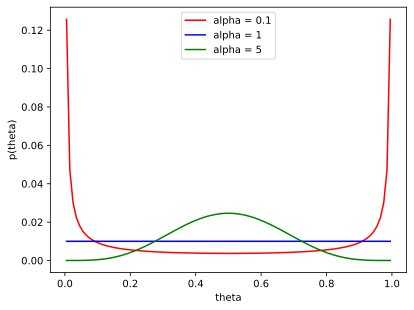

In [12]:
lines_pw1 = [
    plt.plot(possible_pw1, calculate_prior(0.1), 'red', label = "alpha = 0.1"),
    plt.plot(possible_pw1, calculate_prior(1), 'blue', label = "alpha = 1"),
    plt.plot(possible_pw1, calculate_prior(5), 'green', label = "alpha = 5")
]

for p in lines_pw1:
    plt.xlabel("theta")
    plt.ylabel("p(theta)")
    plt.legend()

1. alpha prior 0.1 leads to a prior bias for regularity: either 0% probability of using word 1, OR near 100% probability of using word 1
2. alpha prior 1 leads to a uniform prior: the probabilities of using word 1 are a priori equally likely
3. alpha prior 5 leads to a prior bias for variability

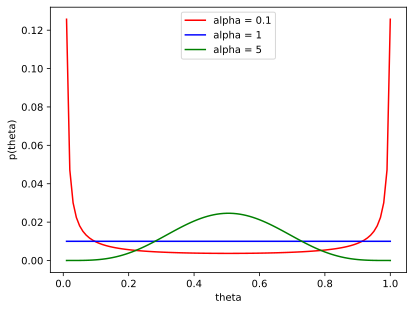

In [13]:
lines_pw1_3 = [
    plt.plot(possible_pw1_3, calculate_prior(0.1), 'red', label = "alpha = 0.1"),
    plt.plot(possible_pw1_3, calculate_prior(1), 'blue', label = "alpha = 1"),
    plt.plot(possible_pw1_3, calculate_prior(5), 'green', label = "alpha = 5")
]

for l in lines_pw1_3:
    plt.xlabel("theta")
    plt.ylabel("p(theta)")

plt.legend()

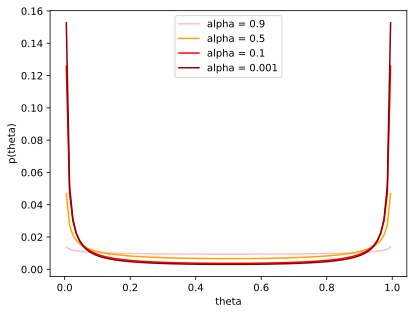

In [14]:
plt.plot(possible_pw1, calculate_prior(0.9), 'pink', label = 'alpha = 0.9')
plt.plot(possible_pw1, calculate_prior(0.5), 'orange', label = 'alpha = 0.5')
plt.plot(possible_pw1, calculate_prior(0.1), 'red', label = 'alpha = 0.1')
plt.plot(possible_pw1, calculate_prior(0.001), 'darkred', label = 'alpha = 0.001')

plt.xlabel("theta")
plt.ylabel("p(theta)")
plt.legend()

Text(0, 0.5, 'p(theta)')

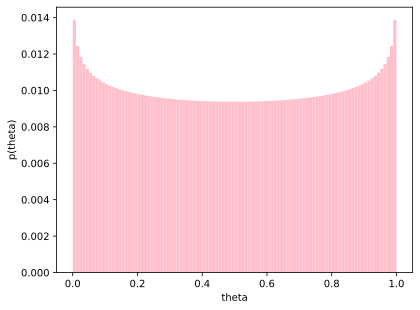

In [15]:
plt.bar(possible_pw1, calculate_prior(0.9), color = 'pink', align = 'center', width = 1 / grid_granularity)
plt.xlabel("theta")
plt.ylabel("p(theta)")

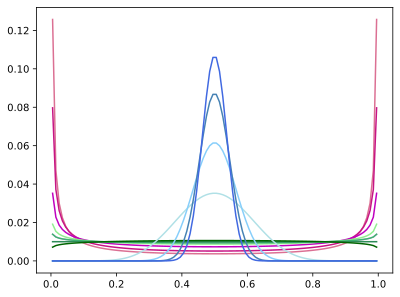

In [16]:
plt.plot(possible_pw1, calculate_prior(0.1), 'palevioletred')
plt.plot(possible_pw1, calculate_prior(0.3), 'mediumvioletred')
plt.plot(possible_pw1, calculate_prior(0.6), 'm')
plt.plot(possible_pw1, calculate_prior(0.9), 'plum')

plt.plot(possible_pw1, calculate_prior(0.8), 'lightgreen')
plt.plot(possible_pw1, calculate_prior(0.9), 'mediumseagreen')
plt.plot(possible_pw1, calculate_prior(1), 'seagreen')
plt.plot(possible_pw1, calculate_prior(1.1), 'darkgreen')

plt.plot(possible_pw1, calculate_prior(10), 'powderblue')
plt.plot(possible_pw1, calculate_prior(30), 'lightskyblue')
plt.plot(possible_pw1, calculate_prior(60), 'steelblue')
plt.plot(possible_pw1, calculate_prior(90), 'royalblue')

Likelihood

In [17]:
def likelihood(data, possible_pw1):
    possible_pw0 = 1 - possible_pw1
    probs = [possible_pw0, possible_pw1]
    likelihoods = []
    for d in data:
        likelihood_this_item = probs[d]
        likelihoods.append(likelihood_this_item)
    return prod(likelihoods)

In [18]:
likelihood([0,0,0,0,0,0], 0.1)

0.5314410000000002

In [19]:
data_lists = []
d = round(random.random())

# list_of_lists = [[i for i in range(1,6)] for _ in range(5)]

In [20]:
list_of_lists = []
list = []
n = 5

for i in range(5):
    for i in range(n):
        list.append(round(random.random()))
    # print(list)
    list_of_lists.append(list)
    # print(list_of_lists)
    list = []
print(list_of_lists)

for list in list_of_lists:
    print(likelihood(list, 0.1))

[[0, 1, 1, 0, 1], [0, 0, 0, 0, 0], [1, 0, 1, 1, 0], [0, 0, 1, 0, 0], [1, 1, 1, 0, 1]]
0.0008100000000000002
0.5904900000000002
0.0008100000000000002
0.06561000000000002
9.000000000000002e-05


In [21]:
print(0.9*0.9*0.9*0.9*0.9)
print(0.9*0.9*0.1*0.1*0.1)
print(0.1*0.1*0.1*0.9*0.9)
print(0.1*0.9*0.9*0.9*0.9)
print(0.1*0.9*0.9*0.9*0.9)

0.5904900000000002
0.0008100000000000002
0.0008100000000000002
0.06561000000000002
0.06561000000000002


In [22]:
def produce(possible_pw1, n_productions):
    possible_pw0 = 1 - possible_pw1
    probs = [possible_pw0, possible_pw1]
    generated_data = []
    for p in range(n_productions):
        generated_data.append(roulette_wheel(probs))
        # roulette_wheel returns the integer index value of the probability from probs = [0.1, 0.9]
        # that is greater than the random number generated at the start
        # generate random r value, r = 0.01
        # is r < pw0 (0.1)?
        # if yes, return a 0
        # generate another random number, r = 0.5
        # is r < pw0 (0.1)?
        # if no, add 0.1 + 0.9
        # is r < 1? 
        # yes, return the index value of the probability that made the accumulator larger than the r, random integer value
    return generated_data

for x in range(3):
    print(produce(0.5, 10))

[1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
[1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]


In [23]:
print(likelihood([0,0,1,1], 0.5))
0.5 * 0.5 * 0.5 * 0.5

0.0625


0.0625

In [24]:
def posterior(data, prior):
    posterior_probs = []
    for i in range(len(possible_pw1)):
        pW1 = possible_pw1[i]
        p_h = prior[i]
        p_d = likelihood(data, pW1)
        p_h_given_d = p_h * p_d
        posterior_probs.append(p_h_given_d)
    return normalize_probs(posterior_probs)

def learn(data, prior):
    posterior_probs = posterior(data, prior)
    selected_index = roulette_wheel(posterior_probs)
    return possible_pw1[selected_index]

This is a uniform prior learner, exposed to data where 0's and 1's have equal frequency. 

data1 [0, 1] 

data2 [0, 0, 1, 1] 

data3 [0, 0, 0, 0, 1, 1, 1, 1] 

data4 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] 



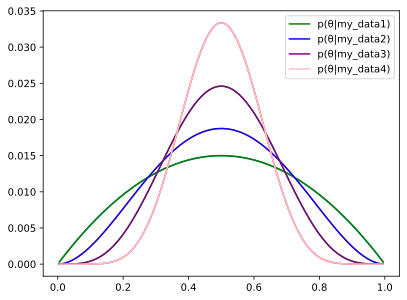

In [25]:
my_prior1 = calculate_prior(1)
my_data1 = [0] * 1 + [1] * 1
my_posterior1 = posterior(my_data1, my_prior1)
plt.plot(possible_pw1, my_posterior1)
plt.plot(possible_pw1, my_posterior1,'green',label='p(θ|my_data1)')

my_data2 = [0] * 2 + [1] * 2
my_posterior2 = posterior(my_data2, my_prior1)
plt.plot(possible_pw1, my_posterior2)
plt.plot(possible_pw1, my_posterior2,'blue',label='p(θ|my_data2)')

my_data3 = [0] * 4 + [1] * 4
my_posterior3 = posterior(my_data3, my_prior1)
plt.plot(possible_pw1, my_posterior3)
plt.plot(possible_pw1, my_posterior3,'purple',label='p(θ|my_data3)')

my_data4 = [0] * 8 + [1] * 8
my_posterior4 = posterior(my_data4, my_prior1)
plt.plot(possible_pw1, my_posterior4)
plt.plot(possible_pw1, my_posterior4,'pink',label='p(θ|my_data4)')

plt.legend()

datas = []
datas.append(my_data1)
datas.append(my_data2)
datas.append(my_data3)
datas.append(my_data4)

range(len(datas))
list = [i + 1 for i in range(len(datas))]
['datas' + str(i + 1) for i in range(len(datas))]

numbered_datas = dict(zip(['data' + str(i + 1) for i in range(len(datas))], datas))

for key, value in numbered_datas.items():
    print(key, value, '\n')

This is a uniform prior learner, where  
1 increases its frequency. 

data1 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] 

data2 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

data3 [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

data4 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 



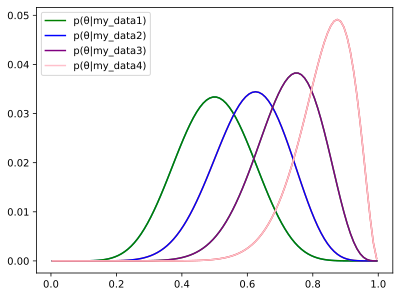

In [26]:
my_prior1 = calculate_prior(1)
my_data1 = [0] * 8 + [1] * 8
my_posterior1 = posterior(my_data1, my_prior1)
plt.plot(possible_pw1, my_posterior1)
plt.plot(possible_pw1, my_posterior1,'green',label='p(θ|my_data1)')

my_data2 = [0] * 6 + [1] * 10
my_posterior2 = posterior(my_data2, my_prior1)
plt.plot(possible_pw1, my_posterior2)
plt.plot(possible_pw1, my_posterior2,'blue',label='p(θ|my_data2)')

my_data3 = [0] * 4 + [1] * 12
my_posterior3 = posterior(my_data3, my_prior1)
plt.plot(possible_pw1, my_posterior3)
plt.plot(possible_pw1, my_posterior3,'purple',label='p(θ|my_data3)')

my_data4 = [0] * 2 + [1] * 14
my_posterior4 = posterior(my_data4, my_prior1)

plt.plot(possible_pw1, my_posterior4)
plt.plot(possible_pw1, my_posterior4,'pink',label='p(θ|my_data4)')

plt.legend()

datas = []
datas.append(my_data1)
datas.append(my_data2)
datas.append(my_data3)
datas.append(my_data4)

range(len(datas))
list = [i + 1 for i in range(len(datas))]
['datas' + str(i + 1) for i in range(len(datas))]

numbered_datas = dict(zip(['data' + str(i + 1) for i in range(len(datas))], datas))

for key, value in numbered_datas.items():
    print(key, value, '\n')

This is a biased learner, exposed to data where 0's and 1's have equal frequency.
alpha = 0.1 is a regularity prior

data1 [0, 1] 

data2 [0, 0, 1, 1] 

data3 [0, 0, 0, 0, 1, 1, 1, 1] 

data4 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] 



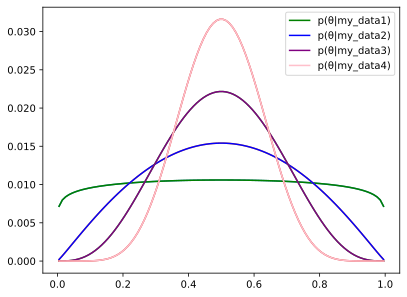

In [27]:
my_prior1 = calculate_prior(0.1)
my_data1 = [0] * 1 + [1] * 1
my_posterior1 = posterior(my_data1, my_prior1)
plt.plot(possible_pw1, my_posterior1)
plt.plot(possible_pw1, my_posterior1,'green',label='p(θ|my_data1)')

my_data2 = [0] * 2 + [1] * 2
my_posterior2 = posterior(my_data2, my_prior1)
plt.plot(possible_pw1, my_posterior2)
plt.plot(possible_pw1, my_posterior2,'blue',label='p(θ|my_data2)')

my_data3 = [0] * 4 + [1] * 4
my_posterior3 = posterior(my_data3, my_prior1)
plt.plot(possible_pw1, my_posterior3)
plt.plot(possible_pw1, my_posterior3,'purple',label='p(θ|my_data3)')

my_data4 = [0] * 8 + [1] * 8
my_posterior4 = posterior(my_data4, my_prior1)
plt.plot(possible_pw1, my_posterior4)
plt.plot(possible_pw1, my_posterior4,'pink',label='p(θ|my_data4)')

plt.legend()

datas = []
datas.append(my_data1)
datas.append(my_data2)
datas.append(my_data3)
datas.append(my_data4)

range(len(datas))
list = [i + 1 for i in range(len(datas))]
['datas' + str(i + 1) for i in range(len(datas))]

numbered_datas = dict(zip(['data' + str(i + 1) for i in range(len(datas))], datas))

for key, value in numbered_datas.items():
    print(key, value, '\n')

data1 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] 

data2 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

data3 [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

data4 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 



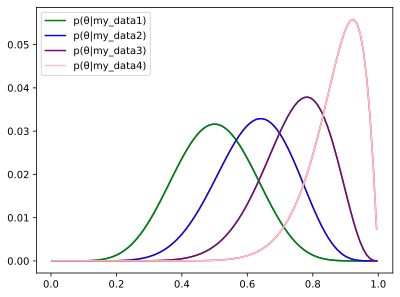

In [28]:
my_prior1 = calculate_prior(0.1)
my_data1 = [0] * 8 + [1] * 8
my_posterior1 = posterior(my_data1, my_prior1)
plt.plot(possible_pw1, my_posterior1)
plt.plot(possible_pw1, my_posterior1,'green',label='p(θ|my_data1)')

my_data2 = [0] * 6 + [1] * 10
my_posterior2 = posterior(my_data2, my_prior1)
plt.plot(possible_pw1, my_posterior2)
plt.plot(possible_pw1, my_posterior2,'blue',label='p(θ|my_data2)')

my_data3 = [0] * 4 + [1] * 12
my_posterior3 = posterior(my_data3, my_prior1)
plt.plot(possible_pw1, my_posterior3)
plt.plot(possible_pw1, my_posterior3,'purple',label='p(θ|my_data3)')

my_data4 = [0] * 2 + [1] * 14
my_posterior4 = posterior(my_data4, my_prior1)
plt.plot(possible_pw1, my_posterior4)
plt.plot(possible_pw1, my_posterior4,'pink',label='p(θ|my_data4)')

plt.legend()

datas = []
datas.append(my_data1)
datas.append(my_data2)
datas.append(my_data3)
datas.append(my_data4)

range(len(datas))
list = [i + 1 for i in range(len(datas))]
['datas' + str(i + 1) for i in range(len(datas))]

numbered_datas = dict(zip(['data' + str(i + 1) for i in range(len(datas))], datas))

for key, value in numbered_datas.items():
    print(key, value, '\n')

This is a learner who favors variable languages: the hypothesis that says, word 1 occurs 50% of the time, is the most probably of the possible hypotheses.

data1 [0, 1] 

data2 [0, 0, 1, 1] 

data3 [0, 0, 0, 0, 1, 1, 1, 1] 

data4 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] 



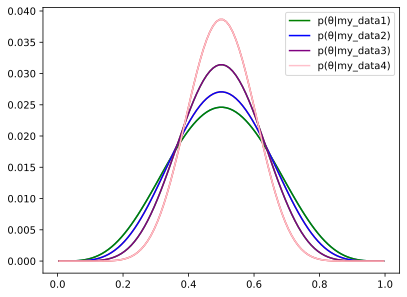

In [29]:
my_prior1 = calculate_prior(4)
my_data1 = [0] * 1 + [1] * 1
my_posterior1 = posterior(my_data1, my_prior1)
plt.plot(possible_pw1, my_posterior1)
plt.plot(possible_pw1, my_posterior1,'green',label='p(θ|my_data1)')

my_data2 = [0] * 2 + [1] * 2
my_posterior2 = posterior(my_data2, my_prior1)
plt.plot(possible_pw1, my_posterior2)
plt.plot(possible_pw1, my_posterior2,'blue',label='p(θ|my_data2)')

my_data3 = [0] * 4 + [1] * 4
my_posterior3 = posterior(my_data3, my_prior1)
plt.plot(possible_pw1, my_posterior3)
plt.plot(possible_pw1, my_posterior3,'purple',label='p(θ|my_data3)')

my_data4 = [0] * 8 + [1] * 8
my_posterior4 = posterior(my_data4, my_prior1)
plt.plot(possible_pw1, my_posterior4)
plt.plot(possible_pw1, my_posterior4,'pink',label='p(θ|my_data4)')

plt.legend()

datas = []
datas.append(my_data1)
datas.append(my_data2)
datas.append(my_data3)
datas.append(my_data4)

range(len(datas))
list = [i + 1 for i in range(len(datas))]
['datas' + str(i + 1) for i in range(len(datas))]

numbered_datas = dict(zip(['data' + str(i + 1) for i in range(len(datas))], datas))

for key, value in numbered_datas.items():
    print(key, value, '\n')

data1 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] 

data2 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

data3 [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

data4 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 



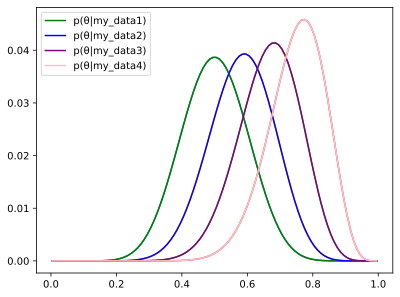

In [30]:
my_prior1 = calculate_prior(4)
my_data1 = [0] * 8 + [1] * 8
my_posterior1 = posterior(my_data1, my_prior1)
plt.plot(possible_pw1, my_posterior1)
plt.plot(possible_pw1, my_posterior1,'green',label='p(θ|my_data1)')

my_data2 = [0] * 6 + [1] * 10
my_posterior2 = posterior(my_data2, my_prior1)
plt.plot(possible_pw1, my_posterior2)
plt.plot(possible_pw1, my_posterior2,'blue',label='p(θ|my_data2)')

my_data3 = [0] * 4 + [1] * 12
my_posterior3 = posterior(my_data3, my_prior1)
plt.plot(possible_pw1, my_posterior3)
plt.plot(possible_pw1, my_posterior3,'purple',label='p(θ|my_data3)')

my_data4 = [0] * 2 + [1] * 14
my_posterior4 = posterior(my_data4, my_prior1)
plt.plot(possible_pw1, my_posterior4)
plt.plot(possible_pw1, my_posterior4,'pink',label='p(θ|my_data4)')

plt.legend()

datas = []
datas.append(my_data1)
datas.append(my_data2)
datas.append(my_data3)
datas.append(my_data4)

range(len(datas))
list = [i + 1 for i in range(len(datas))]
['datas' + str(i + 1) for i in range(len(datas))]

numbered_datas = dict(zip(['data' + str(i + 1) for i in range(len(datas))], datas))

for key, value in numbered_datas.items():
    print(key, value, '\n')

learn and produce are stochastic.

In [31]:
my_uniform_prior = calculate_prior(1)
my_data = [0] * 3 + [1] * 7

uniform_sample_pw1_value = []

for x in range(10):
    uniform_sample_pw1_value.append(learn(my_data, my_uniform_prior))

print(uniform_sample_pw1_value)

[0.595, 0.5650000000000001, 0.455, 0.845, 0.805, 0.875, 0.735, 0.635, 0.655, 0.765]


In [32]:
my_regularity_prior = calculate_prior(0.1)
my_data = [0] * 3 + [1] * 7

regularity_sample_pw1_value = []

for x in range(10):
    regularity_sample_pw1_value.append(learn(my_data, my_regularity_prior))

print(regularity_sample_pw1_value)

[0.5750000000000001, 0.7050000000000001, 0.535, 0.6950000000000001, 0.615, 0.655, 0.5650000000000001, 0.8250000000000001, 0.665, 0.725]


In [33]:
my_variability_prior = calculate_prior(4)
my_data = [0] * 3 + [1] * 7

variability_sample_pw1_value = []

for x in range(10):
    variability_sample_pw1_value.append(learn(my_data, my_variability_prior))

print(variability_sample_pw1_value)

[0.545, 0.615, 0.675, 0.585, 0.435, 0.755, 0.7050000000000001, 0.585, 0.625, 0.315]


Questions

1. Can you produce a result like the Hudson Kam & Newport (2005) results for adults, i.e. that adult learners fairly accurately track the frequency of a linguistic variant in their input? What kinds of priors and what kinds of data does this work for? Be aware: when using large amounts of data, you might run into the kinds of rounding error I mentioned earlier!

In [34]:
possible_pw1
# word 1 occurs with 0.005, 0.015, etc. frequency

[0.005,
 0.015,
 0.025,
 0.034999999999999996,
 0.045,
 0.055,
 0.065,
 0.07500000000000001,
 0.085,
 0.095,
 0.10500000000000001,
 0.115,
 0.125,
 0.135,
 0.14500000000000002,
 0.155,
 0.165,
 0.17500000000000002,
 0.185,
 0.195,
 0.20500000000000002,
 0.215,
 0.225,
 0.23500000000000001,
 0.245,
 0.255,
 0.265,
 0.275,
 0.28500000000000003,
 0.295,
 0.305,
 0.315,
 0.325,
 0.335,
 0.34500000000000003,
 0.35500000000000004,
 0.365,
 0.375,
 0.385,
 0.395,
 0.405,
 0.41500000000000004,
 0.425,
 0.435,
 0.445,
 0.455,
 0.465,
 0.47500000000000003,
 0.485,
 0.495,
 0.505,
 0.515,
 0.525,
 0.535,
 0.545,
 0.555,
 0.5650000000000001,
 0.5750000000000001,
 0.585,
 0.595,
 0.605,
 0.615,
 0.625,
 0.635,
 0.645,
 0.655,
 0.665,
 0.675,
 0.685,
 0.6950000000000001,
 0.7050000000000001,
 0.715,
 0.725,
 0.735,
 0.745,
 0.755,
 0.765,
 0.775,
 0.785,
 0.795,
 0.805,
 0.8150000000000001,
 0.8250000000000001,
 0.8350000000000001,
 0.845,
 0.855,
 0.865,
 0.875,
 0.885,
 0.895,
 0.905,
 0.915,
 0.9

In [35]:
question1_data = [0, 0, 0, 0, 1]
# word 1 occurs with 0.20 frequency

adult_prior_uni = calculate_prior(1)
adult_prior_var = calculate_prior(4)
adult_prior_reg = calculate_prior(0.1)

In [36]:
adult_prior_uni
print(*enumerate(adult_prior_uni), sep='\n')
# equal probability assigned to hypotheses about the frequency of word 1

(0, 0.009999999999999992)
(1, 0.009999999999999998)
(2, 0.009999999999999995)
(3, 0.01)
(4, 0.009999999999999997)
(5, 0.009999999999999998)
(6, 0.009999999999999995)
(7, 0.009999999999999998)
(8, 0.009999999999999995)
(9, 0.009999999999999998)
(10, 0.01)
(11, 0.009999999999999993)
(12, 0.009999999999999997)
(13, 0.009999999999999995)
(14, 0.009999999999999995)
(15, 0.009999999999999997)
(16, 0.01)
(17, 0.009999999999999998)
(18, 0.009999999999999998)
(19, 0.009999999999999997)
(20, 0.009999999999999998)
(21, 0.009999999999999998)
(22, 0.009999999999999997)
(23, 0.009999999999999998)
(24, 0.009999999999999998)
(25, 0.010000000000000004)
(26, 0.009999999999999998)
(27, 0.009999999999999998)
(28, 0.009999999999999998)
(29, 0.009999999999999995)
(30, 0.009999999999999998)
(31, 0.009999999999999998)
(32, 0.009999999999999998)
(33, 0.009999999999999998)
(34, 0.009999999999999995)
(35, 0.009999999999999998)
(36, 0.009999999999999998)
(37, 0.009999999999999998)
(38, 0.009999999999999998)
(39, 

In [37]:
print(*enumerate(adult_prior_var), sep='\n')
# unequal probabilities assigned to hypotheses about the frequency of word 1
# hypotheses that predict word 1 occurs with 0.50 frequency have higher probability than those that predict word 1 occurs with x < 0.50 or x > 0.50 frequency

(0, 1.7238810664403375e-07)
(1, 4.515548520302866e-06)
(2, 2.0275049242008455e-05)
(3, 5.394039440423383e-05)
(4, 0.00011111577012137982)
(5, 0.00019656742049074162)
(6, 0.0003142700155934566)
(7, 0.00046745201149542715)
(8, 0.0006586400022482317)
(9, 0.0008897020638900025)
(10, 0.0011618900904462948)
(11, 0.0014758811219309318)
(12, 0.0018318176643468194)
(13, 0.0022293470016867597)
(14, 0.002667659499934226)
(15, 0.003145525903064121)
(16, 0.003661333621043531)
(17, 0.004213122009832426)
(18, 0.004798616643384388)
(19, 0.005415262577647243)
(20, 0.006060256606563797)
(21, 0.006730578510072368)
(22, 0.007423021294107506)
(23, 0.008134220422600527)
(24, 0.008860682041480095)
(25, 0.009598810194672836)
(26, 0.010344933032103765)
(27, 0.011095328009696911)
(28, 0.011846246081375729)
(29, 0.012593934883063623)
(30, 0.013334660908684388)
(31, 0.014064730678162623)
(32, 0.01478051089742416)
(33, 0.015478447610396448)
(34, 0.016155084343008934)
(35, 0.01680707923919339)
(36, 0.01743122118888

In [38]:
print(*enumerate(adult_prior_reg), sep='\n')

(0, 0.12570515620388714)
(1, 0.04719458027238365)
(2, 0.030075766656639833)
(3, 0.0224249274511489)
(4, 0.01805396398602453)
(5, 0.015214294565352981)
(6, 0.013216437235641186)
(7, 0.011732327353749999)
(8, 0.010585487187231414)
(9, 0.009672347755515488)
(10, 0.008928032605827845)
(11, 0.008309786555458927)
(12, 0.007788263009126118)
(13, 0.007342635678787812)
(14, 0.006957707438647521)
(15, 0.006622123900991167)
(16, 0.006327228094149697)
(17, 0.00606630261486612)
(18, 0.005834054276142699)
(19, 0.005626255183459733)
(20, 0.005439487434853352)
(21, 0.005270958096326659)
(22, 0.00511836284409675)
(23, 0.004979783947873243)
(24, 0.004853612900146021)
(25, 0.004738491007262289)
(26, 0.00463326325543884)
(27, 0.0045369421144056685)
(28, 0.004448678868611707)
(29, 0.004367740712856858)
(30, 0.004293492307010168)
(31, 0.0042253808126915034)
(32, 0.004162923672981444)
(33, 0.004105698571038703)
(34, 0.004053335133167832)
(35, 0.004005508039009617)
(36, 0.0039619312749669365)
(37, 0.003922353

In [39]:
question1_learn_uni = learn(question1_data, adult_prior_uni)
print(question1_learn_uni)
# the unbiased learner picks the hypothesis where word 1 occurs with 0.365 frequency, given the data [0, 0, 0, 0, 1]
# it picks that hypothesis, given its posterior probability

for x in range(100):
    print(learn(question1_data, adult_prior_uni))

0.155
0.17500000000000002
0.165
0.34500000000000003
0.41500000000000004
0.135
0.275
0.025
0.435
0.245
0.10500000000000001
0.185
0.095
0.465
0.07500000000000001
0.325
0.10500000000000001
0.055
0.23500000000000001
0.225
0.315
0.34500000000000003
0.17500000000000002
0.125
0.085
0.215
0.445
0.095
0.465
0.255
0.625
0.23500000000000001
0.775
0.385
0.41500000000000004
0.47500000000000003
0.405
0.405
0.265
0.34500000000000003
0.35500000000000004
0.225
0.34500000000000003
0.225
0.095
0.14500000000000002
0.225
0.275
0.125
0.34500000000000003
0.305
0.135
0.405
0.20500000000000002
0.495
0.025
0.295
0.325
0.455
0.034999999999999996
0.14500000000000002
0.28500000000000003
0.20500000000000002
0.14500000000000002
0.155
0.135
0.455
0.455
0.515
0.14500000000000002
0.325
0.505
0.185
0.225
0.555
0.585
0.535
0.17500000000000002
0.325
0.445
0.195
0.095
0.785
0.245
0.034999999999999996
0.395
0.065
0.665
0.055
0.14500000000000002
0.495
0.14500000000000002
0.435
0.365
0.275
0.14500000000000002
0.245
0.465
0.27

In [40]:
question1_learn_var = learn(question1_data, adult_prior_var)
print(question1_learn_var)
# the biased learner picks the hypothesis where word 1 occurs with 0.365 frequency, given the data [0, 0, 0, 0, 1]
# it picks that hypothesis, given its posterior probability

for x in range(100):
    print(learn(question1_data, adult_prior_var))

0.395
0.675
0.535
0.455
0.325
0.325
0.295
0.34500000000000003
0.485
0.305
0.455
0.23500000000000001
0.185
0.495
0.17500000000000002
0.375
0.34500000000000003
0.28500000000000003
0.495
0.275
0.465
0.275
0.395
0.375
0.47500000000000003
0.195
0.385
0.515
0.295
0.435
0.485
0.275
0.155
0.465
0.445
0.365
0.325
0.255
0.385
0.505
0.625
0.405
0.375
0.5650000000000001
0.225
0.405
0.155
0.385
0.595
0.225
0.515
0.495
0.365
0.17500000000000002
0.505
0.365
0.535
0.5650000000000001
0.595
0.275
0.255
0.265
0.5750000000000001
0.225
0.325
0.47500000000000003
0.195
0.765
0.34500000000000003
0.325
0.425
0.495
0.34500000000000003
0.255
0.265
0.20500000000000002
0.485
0.325
0.255
0.315
0.275
0.425
0.645
0.385
0.34500000000000003
0.265
0.385
0.35500000000000004
0.41500000000000004
0.5750000000000001
0.495
0.125
0.385
0.20500000000000002
0.455
0.375
0.385
0.47500000000000003
0.435
0.485
0.265


In [41]:
question1_learn_reg = learn(question1_data, adult_prior_reg)
print(question1_learn_reg)
# the biased learner picks the hypothese where word 1 occurs with 0.365 frequency, given the data [0, 0, 0, 0, 1]
# it picks that hypothesis, given its posterior probability

for x in range(100):
    print(learn(question1_data, adult_prior_reg))

0.14500000000000002
0.17500000000000002
0.195
0.135
0.485
0.35500000000000004
0.07500000000000001
0.195
0.315
0.295
0.07500000000000001
0.14500000000000002
0.41500000000000004
0.045
0.195
0.045
0.255
0.17500000000000002
0.155
0.165
0.34500000000000003
0.225
0.765
0.515
0.045
0.23500000000000001
0.405
0.265
0.015
0.41500000000000004
0.23500000000000001
0.045
0.10500000000000001
0.315
0.125
0.305
0.055
0.015
0.155
0.215
0.095
0.155
0.115
0.295
0.265
0.025
0.5650000000000001
0.095
0.315
0.034999999999999996
0.655
0.155
0.305
0.055
0.045
0.045
0.165
0.034999999999999996
0.055
0.055
0.405
0.23500000000000001
0.185
0.245
0.055
0.405
0.115
0.465
0.245
0.10500000000000001
0.045
0.305
0.034999999999999996
0.10500000000000001
0.315
0.265
0.255
0.35500000000000004
0.20500000000000002
0.065
0.085
0.485
0.47500000000000003
0.28500000000000003
0.215
0.275
0.47500000000000003
0.085
0.435
0.095
0.045
0.275
0.635
0.165
0.10500000000000001
0.125
0.034999999999999996
0.275
0.315
0.34500000000000003
0.275

ADULT_data1 =  [0, 0, 0, 0, 1, 1, 1, 1]
ADULT_data2 =  [0, 0, 0, 1, 1, 1, 1, 1]
ADULT_data3 =  [0, 0, 1, 1, 1, 1, 1, 1]
ADULT_data4 =  [0, 1, 1, 1, 1, 1, 1, 1]


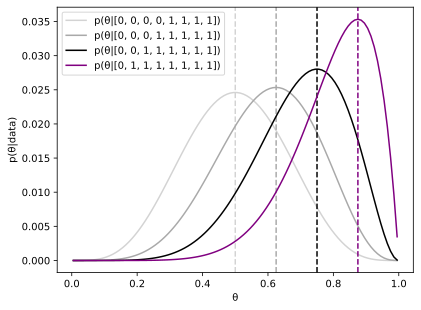

In [42]:
ADULT_prior_uni = calculate_prior(1)

ADULT_data1 = [0] * 4 + [1] * 4
ADULT_data2 = [0] * 3 + [1] * 5
ADULT_data3 = [0] * 2 + [1] * 6
ADULT_data4 = [0] * 1 + [1] * 7

print('ADULT_data1 = ', ADULT_data1)
print('ADULT_data2 = ', ADULT_data2)
print('ADULT_data3 = ', ADULT_data3)
print('ADULT_data4 = ', ADULT_data4)

ADULT_posterior1 = posterior(ADULT_data1, ADULT_prior_uni)
ADULT_posterior2 = posterior(ADULT_data2, ADULT_prior_uni)
ADULT_posterior3 = posterior(ADULT_data3, ADULT_prior_uni)
ADULT_posterior4 = posterior(ADULT_data4, ADULT_prior_uni)

plt.plot(possible_pw1, ADULT_posterior1,'lightgrey',label='p(θ|[0, 0, 0, 0, 1, 1, 1, 1])')
plt.axvline(x=4/8,color='lightgrey',linestyle='--')
plt.plot(possible_pw1, ADULT_posterior2,'darkgrey',label='p(θ|[0, 0, 0, 1, 1, 1, 1, 1])')
plt.axvline(x=5/8,color='darkgrey',linestyle='--')
plt.plot(possible_pw1, ADULT_posterior3,'black',label='p(θ|[0, 0, 1, 1, 1, 1, 1, 1])')
plt.axvline(x=6/8,color='black',linestyle='--')
plt.plot(possible_pw1, ADULT_posterior4,'purple',label='p(θ|[0, 1, 1, 1, 1, 1, 1, 1])')
plt.axvline(x=7/8,color='purple',linestyle='--')
plt.xlabel("θ")
plt.ylabel("p(θ|data)")
plt.legend()

data1 =  [0, 0, 0, 0, 1, 1, 1, 1]
data2 =  [0, 0, 0, 1, 1, 1, 1, 1]
data3 =  [0, 0, 1, 1, 1, 1, 1, 1]
data4 =  [0, 1, 1, 1, 1, 1, 1, 1]


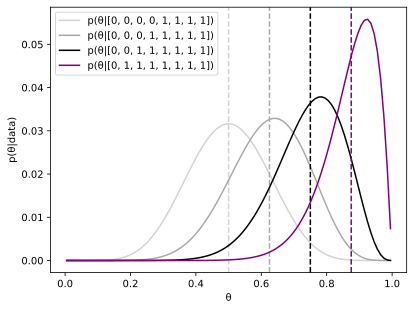

In [43]:
ADULT_prior_reg = calculate_prior(0.1)

ADULT_data1 = [0] * 4 + [1] * 4
ADULT_data2 = [0] * 3 + [1] * 5
ADULT_data3 = [0] * 2 + [1] * 6
ADULT_data4 = [0] * 1 + [1] * 7

print('data1 = ', ADULT_data1)
print('data2 = ', ADULT_data2)
print('data3 = ', ADULT_data3)
print('data4 = ', ADULT_data4)

ADULT_posterior1 = posterior(my_data1, ADULT_prior_reg)
ADULT_posterior2 = posterior(my_data2, ADULT_prior_reg)
ADULT_posterior3 = posterior(my_data3, ADULT_prior_reg)
ADULT_posterior4 = posterior(my_data4, ADULT_prior_reg)

plt.plot(possible_pw1, ADULT_posterior1,'lightgrey',label='p(θ|[0, 0, 0, 0, 1, 1, 1, 1])')
plt.axvline(x=4/8,color='lightgrey',linestyle='--')
plt.plot(possible_pw1, ADULT_posterior2,'darkgrey',label='p(θ|[0, 0, 0, 1, 1, 1, 1, 1])')
plt.axvline(x=5/8,color='darkgrey',linestyle='--')
plt.plot(possible_pw1, ADULT_posterior3,'black',label='p(θ|[0, 0, 1, 1, 1, 1, 1, 1])')
plt.axvline(x=6/8,color='black',linestyle='--')
plt.plot(possible_pw1, ADULT_posterior4,'purple',label='p(θ|[0, 1, 1, 1, 1, 1, 1, 1])')
plt.axvline(x=7/8,color='purple',linestyle='--')
plt.xlabel("θ")
plt.ylabel("p(θ|data)")
plt.legend()

ADULT_data1 =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
ADULT_data2 =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
ADULT_data3 =  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
ADULT_data4 =  [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


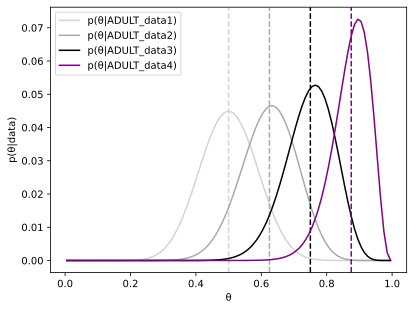

In [44]:
ADULT_prior_reg = calculate_prior(0.1)

ADULT_data1 = [0] * 16 + [1] * 16
ADULT_data2 = [0] * 12 + [1] * 20
ADULT_data3 = [0] * 8 + [1] * 24
ADULT_data4 = [0] * 4 + [1] * 28

print('ADULT_data1 = ', ADULT_data1)
print('ADULT_data2 = ', ADULT_data2)
print('ADULT_data3 = ', ADULT_data3)
print('ADULT_data4 = ', ADULT_data4)

ADULT_posterior1 = posterior(ADULT_data1, ADULT_prior_reg)
ADULT_posterior2 = posterior(ADULT_data2, ADULT_prior_reg)
ADULT_posterior3 = posterior(ADULT_data3, ADULT_prior_reg)
ADULT_posterior4 = posterior(ADULT_data4, ADULT_prior_reg)

plt.plot(possible_pw1, ADULT_posterior1,'lightgrey',label='p(θ|ADULT_data1)')
plt.axvline(x=16/32,color='lightgrey',linestyle='--')
plt.plot(possible_pw1, ADULT_posterior2,'darkgrey',label='p(θ|ADULT_data2)')
plt.axvline(x=20/32,color='darkgrey',linestyle='--')
plt.plot(possible_pw1, ADULT_posterior3,'black',label='p(θ|ADULT_data3)')
plt.axvline(x=24/32,color='black',linestyle='--')
plt.plot(possible_pw1, ADULT_posterior4,'purple',label='p(θ|ADULT_data4)')
plt.axvline(x=28/32,color='purple',linestyle='--')
plt.xlabel("θ")
plt.ylabel("p(θ|data)")
plt.legend()

2. Can you produce a result like the Hudson Kam & Newport (2005) results for children, i.e. that children tend to regularise, sometimes producing only one variant even when their data contains variation? Again, what kinds of priors and what kinds of data does this work for?

CHILD_data1 =  [0, 0, 0, 0, 1, 1, 1, 1]
CHILD_data2 =  [0, 0, 0, 1, 1, 1, 1, 1]
CHILD_data3 =  [0, 0, 1, 1, 1, 1, 1, 1]
CHILD_data4 =  [0, 1, 1, 1, 1, 1, 1, 1]


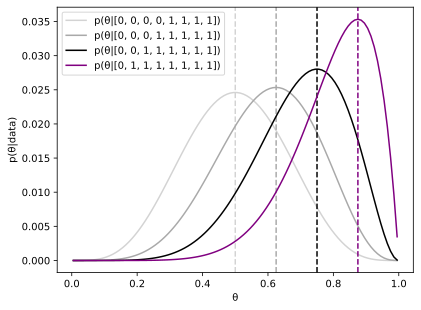

In [49]:
CHILD_prior_uni = calculate_prior(1)

CHILD_data1 = [0] * 4 + [1] * 4
CHILD_data2 = [0] * 3 + [1] * 5
CHILD_data3 = [0] * 2 + [1] * 6
CHILD_data4 = [0] * 1 + [1] * 7

print('CHILD_data1 = ', CHILD_data1)
print('CHILD_data2 = ', CHILD_data2)
print('CHILD_data3 = ', CHILD_data3)
print('CHILD_data4 = ', CHILD_data4)

CHILD_posterior1 = posterior(CHILD_data1, CHILD_prior_uni)
CHILD_posterior2 = posterior(CHILD_data2, CHILD_prior_uni)
CHILD_posterior3 = posterior(CHILD_data3, CHILD_prior_uni)
CHILD_posterior4 = posterior(CHILD_data4, CHILD_prior_uni)

plt.plot(possible_pw1, CHILD_posterior1,'lightgrey',label='p(θ|[0, 0, 0, 0, 1, 1, 1, 1])')
plt.axvline(x=4/8,color='lightgrey',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior2,'darkgrey',label='p(θ|[0, 0, 0, 1, 1, 1, 1, 1])')
plt.axvline(x=5/8,color='darkgrey',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior3,'black',label='p(θ|[0, 0, 1, 1, 1, 1, 1, 1])')
plt.axvline(x=6/8,color='black',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior4,'purple',label='p(θ|[0, 1, 1, 1, 1, 1, 1, 1])')
plt.axvline(x=7/8,color='purple',linestyle='--')
plt.xlabel("θ")
plt.ylabel("p(θ|data)")
plt.legend()

CHILD_data1 =  [0, 0, 0, 0, 1, 1, 1, 1]
CHILD_data2 =  [0, 0, 0, 1, 1, 1, 1, 1]
CHILD_data3 =  [0, 0, 1, 1, 1, 1, 1, 1]
CHILD_data4 =  [0, 1, 1, 1, 1, 1, 1, 1]


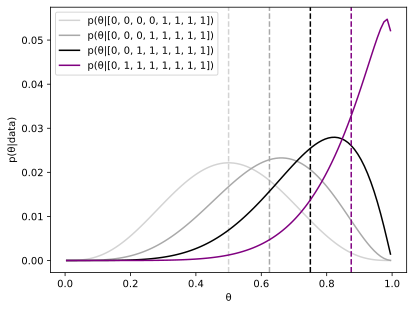

In [50]:
CHILD_prior_reg = calculate_prior(0.1)

CHILD_data1 = [0] * 4 + [1] * 4
CHILD_data2 = [0] * 3 + [1] * 5
CHILD_data3 = [0] * 2 + [1] * 6
CHILD_data4 = [0] * 1 + [1] * 7

print('CHILD_data1 = ', CHILD_data1)
print('CHILD_data2 = ', CHILD_data2)
print('CHILD_data3 = ', CHILD_data3)
print('CHILD_data4 = ', CHILD_data4)

CHILD_posterior1 = posterior(CHILD_data1, CHILD_prior_reg)
CHILD_posterior2 = posterior(CHILD_data2, CHILD_prior_reg)
CHILD_posterior3 = posterior(CHILD_data3, CHILD_prior_reg)
CHILD_posterior4 = posterior(CHILD_data4, CHILD_prior_reg)

plt.plot(possible_pw1, CHILD_posterior1,'lightgrey',label='p(θ|[0, 0, 0, 0, 1, 1, 1, 1])')
plt.axvline(x=4/8,color='lightgrey',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior2,'darkgrey',label='p(θ|[0, 0, 0, 1, 1, 1, 1, 1])')
plt.axvline(x=5/8,color='darkgrey',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior3,'black',label='p(θ|[0, 0, 1, 1, 1, 1, 1, 1])')
plt.axvline(x=6/8,color='black',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior4,'purple',label='p(θ|[0, 1, 1, 1, 1, 1, 1, 1])')
plt.axvline(x=7/8,color='purple',linestyle='--')
plt.xlabel("θ")
plt.ylabel("p(θ|data)")
plt.legend()

CHILD_data1 =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
CHILD_data2 =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
CHILD_data3 =  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
CHILD_data4 =  [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


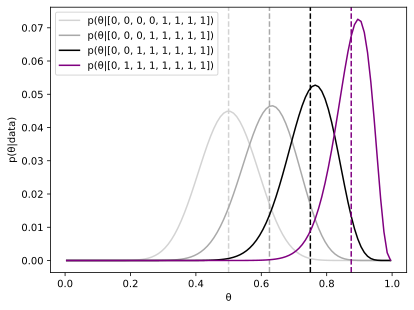

In [52]:
CHILD_prior_reg = calculate_prior(0.1)

CHILD_data1 = [0] * 16 + [1] * 16
CHILD_data2 = [0] * 12 + [1] * 20
CHILD_data3 = [0] * 8 + [1] * 24
CHILD_data4 = [0] * 4 + [1] * 28

print('CHILD_data1 = ', CHILD_data1)
print('CHILD_data2 = ', CHILD_data2)
print('CHILD_data3 = ', CHILD_data3)
print('CHILD_data4 = ', CHILD_data4)

CHILD_posterior1 = posterior(CHILD_data1, CHILD_prior_reg)
CHILD_posterior2 = posterior(CHILD_data2, CHILD_prior_reg)
CHILD_posterior3 = posterior(CHILD_data3, CHILD_prior_reg)
CHILD_posterior4 = posterior(CHILD_data4, CHILD_prior_reg)

plt.plot(possible_pw1, CHILD_posterior1,'lightgrey',label='p(θ|CHILD_data1)')
plt.axvline(x=16/32,color='lightgrey',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior2,'darkgrey',label='p(θ|CHILD_data2)')
plt.axvline(x=20/32,color='darkgrey',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior3,'black',label='p(θ|CHILD_data3)')
plt.axvline(x=24/32,color='black',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior4,'purple',label='p(θ|CHILD_data4)')
plt.axvline(x=28/32,color='purple',linestyle='--')
plt.xlabel("θ")
plt.ylabel("p(θ|data)")
plt.legend()

CHILD_data1 =  [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
CHILD_data2 =  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


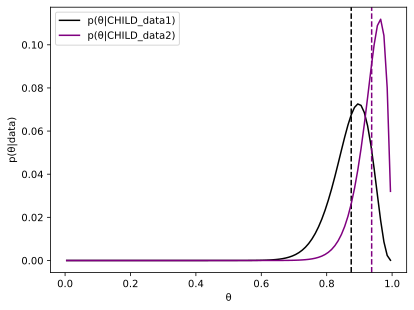

In [55]:
CHILD_prior_reg = calculate_prior(0.1)

CHILD_data1 = [0] * 4 + [1] * 28
CHILD_data2 = [0] * 2 + [1] * 30

print('CHILD_data1 = ', CHILD_data1)
print('CHILD_data2 = ', CHILD_data2)

CHILD_posterior1 = posterior(CHILD_data1, CHILD_prior_reg)
CHILD_posterior2 = posterior(CHILD_data2, CHILD_prior_reg)

plt.plot(possible_pw1, CHILD_posterior1,'black',label='p(θ|CHILD_data1)')
plt.axvline(x=28/32,color='black',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior2,'purple',label='p(θ|CHILD_data2)')
plt.axvline(x=30/32,color='purple',linestyle='--')
plt.xlabel("θ")
plt.ylabel("p(θ|data)")
plt.legend()

CHILD_data1 =  [0, 0, 0, 0, 1, 1, 1, 1]
CHILD_data2 =  [0, 0, 0, 1, 1, 1, 1, 1]
CHILD_data3 =  [0, 0, 1, 1, 1, 1, 1, 1]
CHILD_data4 =  [0, 1, 1, 1, 1, 1, 1, 1]


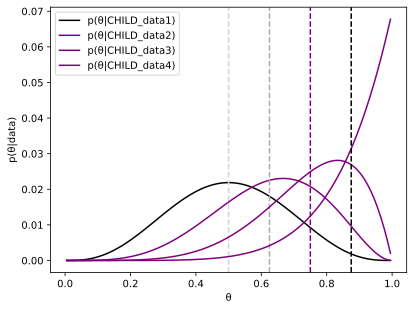

In [61]:
CHILD_prior_reg = calculate_prior(0.001)

CHILD_data1 = [0] * 4 + [1] * 4
CHILD_data2 = [0] * 3 + [1] * 5
CHILD_data3 = [0] * 2 + [1] * 6
CHILD_data4 = [0] * 1 + [1] * 7

print('CHILD_data1 = ', CHILD_data1)
print('CHILD_data2 = ', CHILD_data2)
print('CHILD_data3 = ', CHILD_data3)
print('CHILD_data4 = ', CHILD_data4)

CHILD_posterior1 = posterior(CHILD_data1, CHILD_prior_reg)
CHILD_posterior2 = posterior(CHILD_data2, CHILD_prior_reg)
CHILD_posterior3 = posterior(CHILD_data3, CHILD_prior_reg)
CHILD_posterior4 = posterior(CHILD_data4, CHILD_prior_reg)

plt.plot(possible_pw1, CHILD_posterior1,'black',label='p(θ|CHILD_data1)')
plt.axvline(x=4/8,color='lightgrey',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior2,'purple',label='p(θ|CHILD_data2)')
plt.axvline(x=5/8,color='darkgrey',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior3,'purple',label='p(θ|CHILD_data3)')
plt.axvline(x=6/8,color='purple',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior4,'purple',label='p(θ|CHILD_data4)')
plt.axvline(x=7/8,color='black',linestyle='--')

plt.xlabel("θ")
plt.ylabel("p(θ|data)")
plt.legend()

CHILD_data1 =  [0, 1, 1, 1, 1]
CHILD_data2 =  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


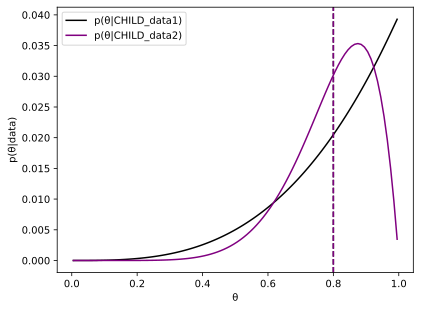

In [63]:
CHILD_prior_reg = calculate_prior(0.001)

CHILD_data1 = [0] * 1 + [1] * 4
CHILD_data2 = [0] * 2 + [1] * 8

print('CHILD_data1 = ', CHILD_data1)
print('CHILD_data2 = ', CHILD_data2)

CHILD_posterior1 = posterior(CHILD_data1, CHILD_prior_reg)
CHILD_posterior2 = posterior(CHILD_data2, CHILD_prior_reg)

plt.plot(possible_pw1, CHILD_posterior1,'black',label='p(θ|CHILD_data1)')
plt.axvline(x=4/5,color='black',linestyle='--')
plt.plot(possible_pw1, CHILD_posterior2,'purple',label='p(θ|CHILD_data2)')
plt.axvline(x=8/10,color='purple',linestyle='--')
plt.xlabel("θ")
plt.ylabel("p(θ|data)")
plt.legend()

3. Do we have any kind innateness in our model? Are there languages our model learner could never learn, no matter what kind of data we gave them? Are there languages they are predisposed to learn, or languages that they are predisposed to not learn?

Hypotheses that are not in our hypothesis space of possible word 1 frequencies will never be considered: a hypothesis that predicts word 1 will occur 0.010 often will not be considered (grid-granulity dependent feature).  
The value we set for alpha determined the prior bias: low alpha favors regularization (learners that are predisposed to favor regular languages), high alpha favors variability (learners that are predisposed to favor variable languages), and when alpha = 1, hypotheses in the hypothesis space have equal probability (learners are not predisposed to favor a hypothesis in the hyposthesis space).

4. [Harder, mainly a coding problem] It turns out that one reason this type of model (known as the beta-binomial model) is so popular is that there is a handy shortcut for working out the posterior: if your prior is beta($\alpha, \alpha$) and you see a occurences of word 0 and b occurences of word 1 then your posterior distribution will also be a beta distribution, beta($\alpha$ + b, $\alpha$ + a). We won't be using this shortcut because we'll be moving on from beta-binomial models shortly and our grid technique works for all the examples we are going to be dealing with, but for fun: can you use the beta.pdf function to write a new version of the posterior function? And can you use the function beta.rvs(x,y) (which samples a random number from a beta distribution with parameters x and y) to replace our learn function above?

In [67]:
print(beta.pdf(x = 0.9, a = (0.001 + 5), b = (0.001 + 5)))
# x = frequency of word 1
# a = the prior and the frequency word 1
# in this example, frequencies word 1 that are close to 0 or close to 1 are favored, before any data is observed
# b = the prior and the frequency of word 0

0.04129642675621843


In [94]:
def posterior(data, prior):
    posterior_probs = []
    for i in range(len(possible_pw1)):
        pW1 = possible_pw1[i]
        p_h = prior[i]
        p_d = likelihood(data, pW1)
        p_h_given_d = p_h * p_d
        posterior_probs.append(p_h_given_d)
    return normalize_probs(posterior_probs)

def shorter_posterior(data, prior):
    nw1 = sum(data)
    # [0, 0, 0, 1] = 1; [0, 0, 1, 1, 1] = 3
    nw0 = len(data) - nw1
    posterior_probs_short = []
    for i in range(len(possible_pw1)):
        pw1 = possible_pw1[i]
        posterior_probs_short.append(beta.pdf(pw1, prior + nw1, prior + nw0))
    return normalize_probs(posterior_probs_short)

In [95]:
print(shorter_posterior([0, 1], 0.001))
print(posterior([0, 1], (calculate_prior(0.001))))

[0.00996694899170962, 0.00997780403408973, 0.009982800387385407, 0.009986056937234014, 0.009988462844834076, 0.009990362274511857, 0.009991925046102799, 0.009993247545430198, 0.009994389773649274, 0.009995391626645376, 0.00999628097852265, 0.009997078070811176, 0.009997798064808903, 0.00999845260869783, 0.00999905084327213, 0.009999600071550896, 0.010000106218662411, 0.010000574156195501, 0.01000100793628734, 0.010001410964002212, 0.01000178612654212, 0.010002135891639063, 0.010002462383543239, 0.010002767442456739, 0.010003052671554099, 0.01000331947456984, 0.010003569086130058, 0.01000380259643975, 0.01000402097153437, 0.0100042250700118, 0.010004415656946927, 0.010004593415532016, 0.01000475895686719, 0.01000491282823455, 0.010005055520121094, 0.01000518747220175, 0.010005309078452622, 0.010005420691531963, 0.010005522626540697, 0.010005615164253672, 0.01000569855389655, 0.010005773015529762, 0.010005838742090253, 0.010005895901132775, 0.010005944636305008, 0.010005985068584905, 0.0

In [100]:
def learn(data, prior):
    posterior_probs = posterior(data, prior)
    selected_index = roulette_wheel(posterior_probs)
    return possible_pw1[selected_index]

def shorter_learn(data, prior):
    nw1 = sum(data)
    nw0 = len(data) - nw1
    sampled_pw1 = beta.rvs(prior + nw1, prior + nw0)
    return sampled_pw1

for i in range(10):
    print(learn([0,1], calculate_prior(1)))

# STOCHASTIC: sometimes pick values of pw1 that have lower posterior probability

for i in range(10):
    print(shorter_learn([0,1], 1))

# this is not sampling from the grid of our hypothesis space, it is sampling a frequency of word 1 that has high posterior probability, with some degree of randomness
# at times, it will spit out a value that is not near 0. (given our unbiased learner, and the equal distribution of word 0 and word 1 in the data)

0.915
0.125
0.715
0.295
0.215
0.675
0.5650000000000001
0.465
0.435
0.405
0.6921706182780379
0.5800377100669182
0.5872601707938666
0.4650795272925617
0.5304876975504169
0.8628202341706147
0.7039527858470128
0.6800468001773085
0.5681290792507196
0.6049130701454615
